In [72]:
import pandas as pd
import numpy as np
from scipy import stats
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize

In [31]:
warnings.filterwarnings('ignore')
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

useducation_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [17]:
useducation_df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [36]:
useducation_dfcopy = useducation_df.copy()
na_columns_list = list(useducation_dfcopy.columns)
for column in na_columns_list:
    useducation_dfcopy.loc[:, column] = useducation_dfcopy.loc[:, column].interpolate()

In [37]:
useducation_df1 = useducation_dfcopy[['TOTAL_REVENUE','TOTAL_EXPENDITURE']]

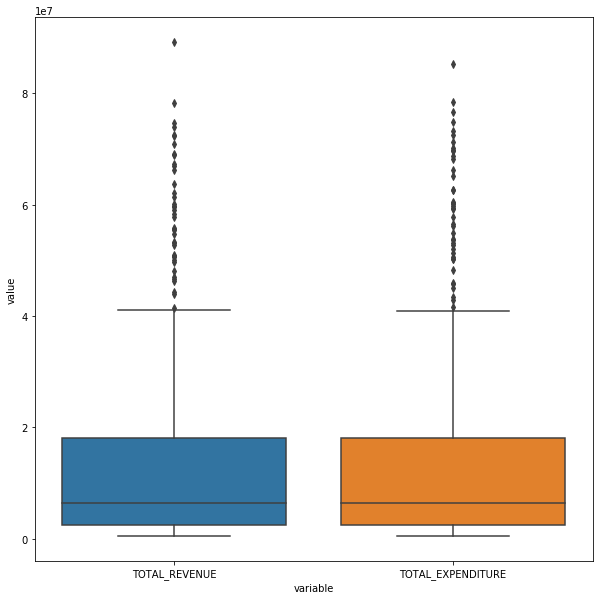

In [51]:
# Problem 1
plt.figure(figsize=(10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(useducation_df1))
plt.show()


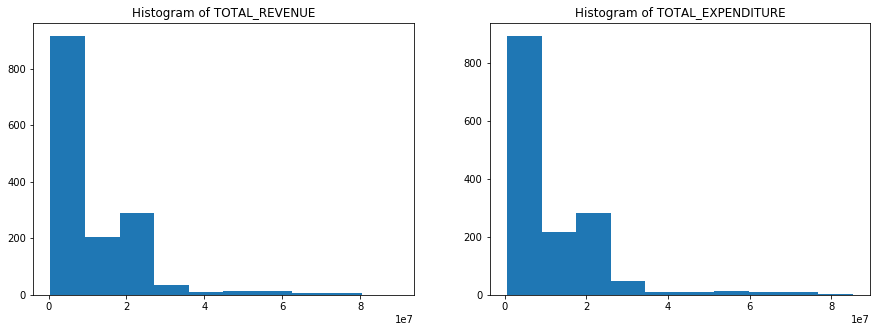

In [54]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(useducation_df1["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.hist(useducation_df1["TOTAL_EXPENDITURE"])
plt.title("Histogram of TOTAL_EXPENDITURE")
plt.show()

From above, it is clear that both of these variables have outliers.

In [53]:
#Problem 2
useducation_df2 = np.log(useducation_df1)

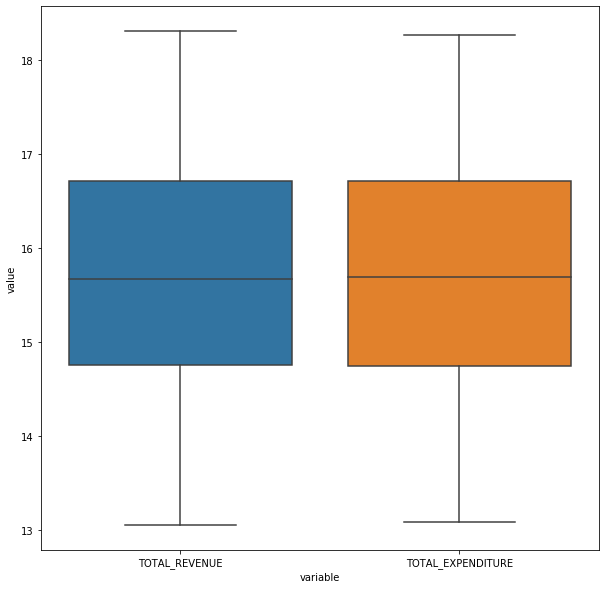

In [57]:
plt.figure(figsize=(10, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(useducation_df2))
plt.show()

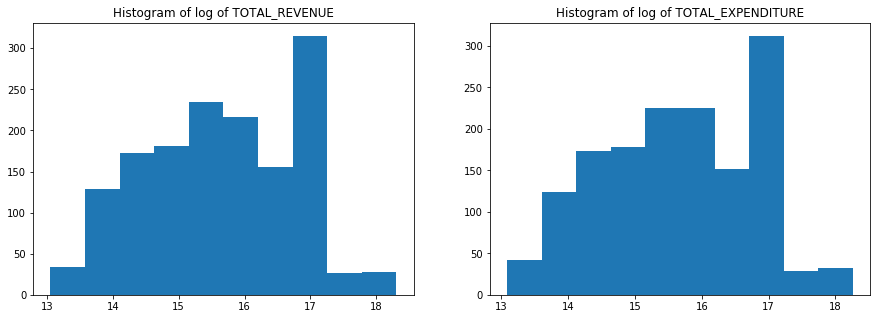

In [55]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.hist(useducation_df2["TOTAL_REVENUE"])
plt.title("Histogram of log of TOTAL_REVENUE")

plt.subplot(1,2,2)
plt.hist(useducation_df2["TOTAL_EXPENDITURE"])
plt.title("Histogram of log of TOTAL_EXPENDITURE")
plt.show()

In [58]:
q75, q25 = np.percentile(useducation_df2["TOTAL_EXPENDITURE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((useducation_df2["TOTAL_EXPENDITURE"] > max_val) 
                      | (useducation_df2["TOTAL_EXPENDITURE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [59]:
q75, q25 = np.percentile(useducation_df2["TOTAL_REVENUE"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((useducation_df2["TOTAL_REVENUE"] > max_val) 
                      | (useducation_df2["TOTAL_REVENUE"] < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


It seems the log transformation eliminated for each category

In [60]:
#Problem 3
bud_def = useducation_df1['TOTAL_REVENUE'] - useducation_df1['TOTAL_EXPENDITURE']

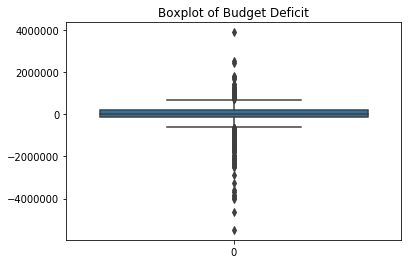

In [68]:
sns.boxplot(data=bud_def)
plt.title("Boxplot of Budget Deficit")
plt.show()

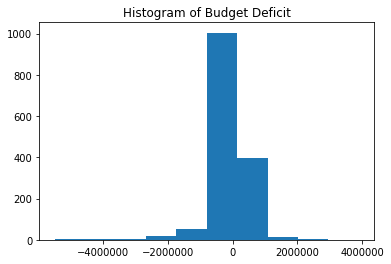

In [64]:
plt.hist(bud_def)
plt.title("Histogram of Budget Deficit")
plt.show()

Outliers are present in this data.

In [74]:
winsorized_bud_def = winsorize(bud_def, (0.10, 0.10))

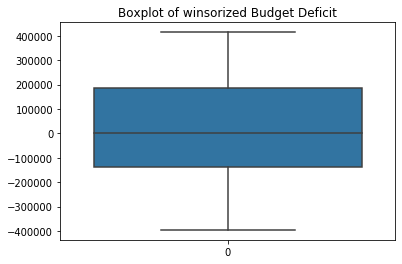

In [75]:
sns.boxplot(data=winsorized_bud_def)
plt.title("Boxplot of winsorized Budget Deficit")
plt.show()

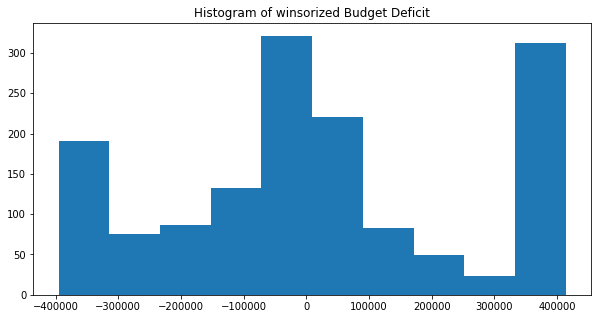

In [78]:
plt.figure(figsize = (10,5))
plt.hist(winsorized_bud_def)
plt.title("Histogram of winsorized Budget Deficit")
plt.show()

In [81]:
q75, q25 = np.percentile(winsorized_bud_def, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((winsorized_bud_def > max_val) 
                      | (winsorized_bud_def < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


The winsorized method worked eliminating the outliers. Even the log transform still had outliers.

In [83]:
#Problem 4
bud_def2 = useducation_df2['TOTAL_REVENUE'] - useducation_df2['TOTAL_EXPENDITURE']

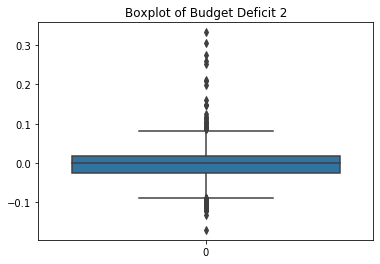

In [84]:
sns.boxplot(data=bud_def2)
plt.title("Boxplot of Budget Deficit 2")
plt.show()

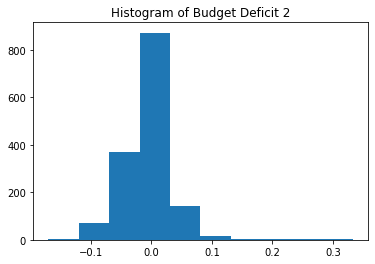

In [85]:
plt.hist(bud_def2)
plt.title("Histogram of Budget Deficit 2")
plt.show()

In [89]:
winsorized_bud_def2 = winsorize(bud_def2, (0.10, 0.10))

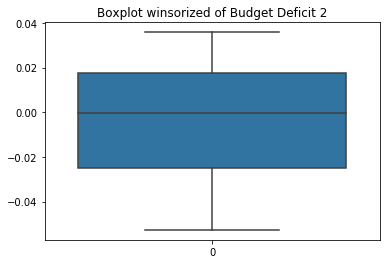

In [91]:
sns.boxplot(data=winsorized_bud_def2)
plt.title("Boxplot winsorized of Budget Deficit 2")
plt.show()

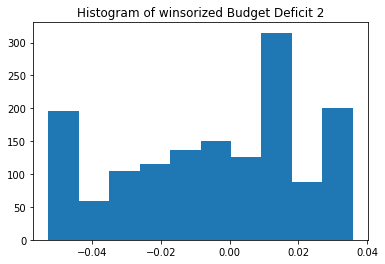

In [92]:
plt.hist(winsorized_bud_def2)
plt.title("Histogram of winsorized Budget Deficit 2")
plt.show()

In [93]:
q75, q25 = np.percentile(winsorized_bud_def2, [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((winsorized_bud_def2 > max_val) 
                      | (winsorized_bud_def2 < min_val))[0]))
    ))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [102]:
#Problem 5
bud_def_df = pd.DataFrame(data =[winsorized_bud_def,winsorized_bud_def2] )
bud_def_df = bud_def_df.T
bud_def_df.describe()

,0,1
count,1492.000000,1492.000000
mean,21339.228552,-0.003883
std,255382.952779,0.027705
min,-395270.000000,-0.052706
25%,-136814.750000,-0.024798
50%,-535.500000,-0.000261
75%,187628.500000,0.017574
max,414013.000000,0.035794


The values from problem 3 are easier to digest than from problem 4. They still represent a monetary numeric and make sense. This was because problem 4's values were transformed before the subtraction.

In [103]:
#Problem 6

When trying to report these two techniques to others, it would make more sense to use the technique from problem 3. These values are easier to understand and would take less effort to explain them to a room full of non-technical people.